In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Ayudantía 10+1

Hoy vamos a seguir reforzando el concepto de las regresiones y a aprender el procedimiento de entrenar un modelo con Sklearn.



# Regresión Lineal y polinomial

Comprendamos un poco que estamos haciendo detrás cuando utilizamos alguna **regresión** de la librería Sklearn, brindando un poco de contexto matemático.

En general muchos algoritmos de Machine Learning (y de inteligencia artificial) se enfocan en **optimizar**, es decir, nos interesa encontrar el mejor valor (Mínimos o máximos), de acuerdo a ciertos criterios. 

En el caso de la regresión lineal, lo que nos interesa es minimizar la distancia entre la recta, plano o hiperplano y la colección de puntos (tuplas de datos) y la variable que depende de esos datos (En este caso el Y).

#### En resumen, lo que nos interesa es aproximar los datos de modo que se cumpla una relación que puede ser lineal o polinomial.



## ¿Cómo logramos obtener este valor óptimo?

La regresión lineal utiliza un algoritmo muy conocido que se utiliza inclusive para entrenar redes neuronales.

## [Descenso del gradiente](https://www.ibm.com/es-es/topics/gradient-descent)

Para resumir que hace este algoritmo:

- Colgarse del gradiente de una función (El gradiente es un vector calculado con la derivada, el cual indica la dirección de mayor crecimiento)
- En base a esa derivada ir desplazándonos de saltos en saltos, y así ir acercándonos al óptimo.
- el tamaño del salto queda determinado por una variable llamda $\gamma$, el cual es conocido como tasa de aprendizaje (Learning rate)


$a_{n+1} = a_{n}-\gamma \nabla F(x)$

(El siguiente punto es igual al punto anterior menos lo que debemos desplazarnos según un tamaño del salto, definido por $\gamma$ en la dirección del gradiente $\nabla F(x)$)

Entonces, en el caso de la regresión lineal lo que nos interesa optimizar son los $\beta$, por lo que aplicamos ese algoritmo a los coeficientes.

utilizando algo llamado **error cuadrático medio** (Visto en la ayudantía pasada):

$MSE = \frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y_i})^2$

Si reemplazamos la fórmula de la regresión lineal queda:

$MSE = \frac{1}{n} \sum_{i=1}^{n} (y_i - X_i*\beta)^2$

Como queremos encontrar **el mejor beta**, derivamos con respecto a esta variable y queda:

$\frac{\partial MSE}{\partial \beta} = \frac{2}{n} \sum_{i=1}^{n} X_i^T (X_i*\beta - y_i)$

## Este es nuestro candidato a gradiente. Así para la regresión lineal nuestro descenso del gradiente es:

$\beta_{i+1}  = \beta_{i}+\gamma \frac{2}{n} \sum_{i=1}^{n} X_i^T (X_i*\beta - y_i)$



## Vamos a probarlo en un ejemplo en dos dimensiones (Es decir, solo va a tener $\beta_0 \text{ y } \beta_1$)

(Source: Código del curso Minería de datos IIC2433)

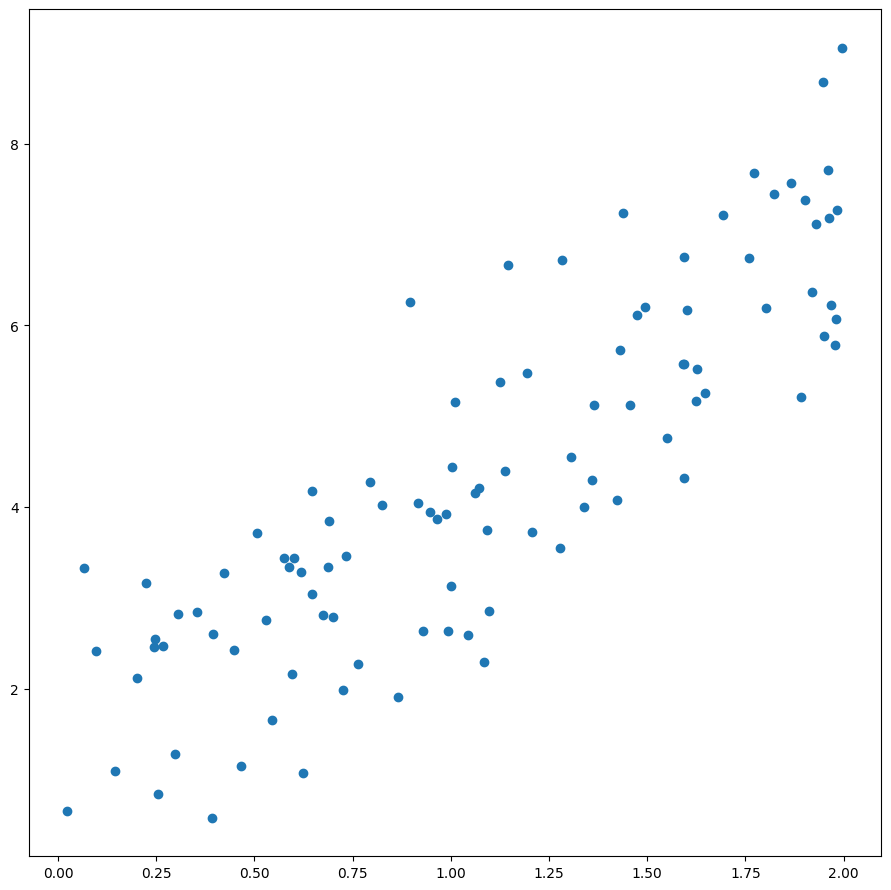

In [40]:
# generemos un set de datos random
X = 2*np.random.rand(100, 1)
y = 1 + 3*X + np.random.randn(100, 1)

plt.scatter(X, y)

In [41]:
X_b = np.c_[np.ones((100, 1)), X]
# Vamos a crear las combinaciones posibles de B
B0 = np.arange(-10, 10, 0.25)
B1 = np.arange(-10, 10, 0.25)

B0, B1 = np.meshgrid(B0, B1)

Z = []
for i in range(B0.shape[0]):
    Z_row = []
    for j in range(B0.shape[1]):
        sum_row = 0
        for k in range(X_b.shape[0]):
            sum_row += (B0[i, j]*X_b[k, 0] + B1[i, j]*X_b[k, 1] - y[k])**2
        sum_row = (1/100) * sum_row
        Z_row.append(float(sum_row))
    Z.append(Z_row)

Z = np.array(Z)

/var/folders/z2/flhcyvts0wx4h743w2gy_yxm0000gn/T/ipykernel_59916/3311573269.py:16: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  Z_row.append(float(sum_row))


## Generamos una sábana con los Beta (Esta función sería la función del error cuadrático medio en 3D )

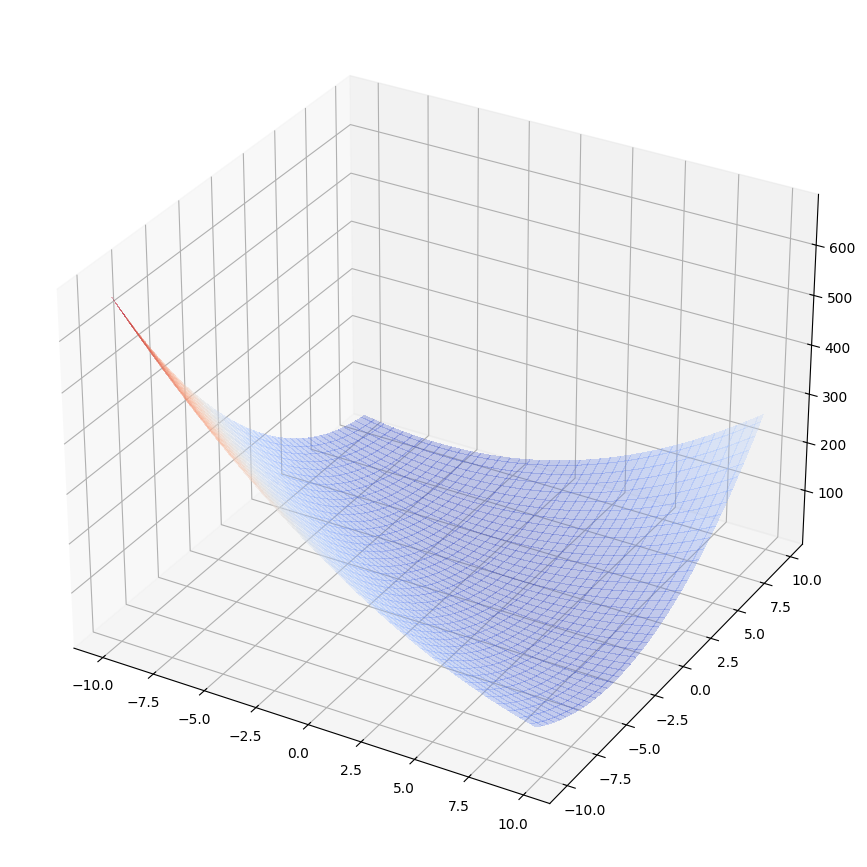

In [42]:
from matplotlib import cm

plt.rcParams['figure.figsize'] = [11, 11]
fig = plt.figure()

sp = plt.subplot(projection='3d')
surf = sp.plot_surface(B0, B1, Z, linewidth=0, antialiased=False, alpha=0.3, cmap=cm.coolwarm)

plt.show()

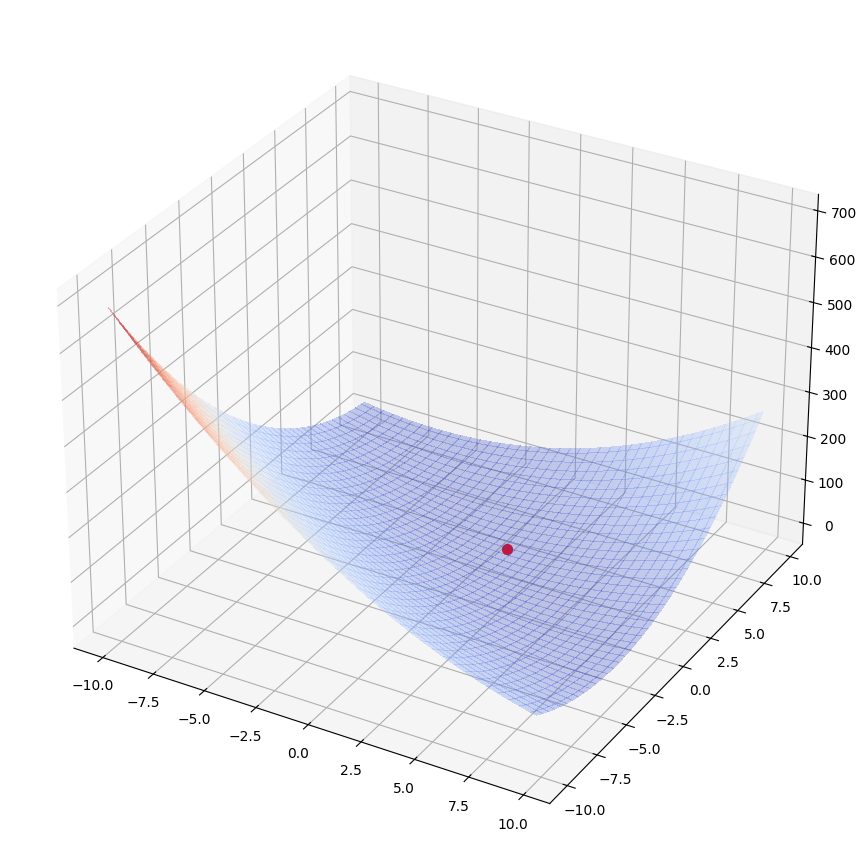

In [43]:
#eta es el learning rate, y paramos luego de 100 iteraciones
eta = 0.1
n_iterations = 100

# Inicializamos valores de Beta random
beta = np.random.randn(2, 1)

# Hacemos n_iterations iteraciones del algoritmo de Gradient Descent
for iteration in range(n_iterations):
    # Esta es la derivada, dado que tenemos 100 muestras
    gradients = 2/100 * X_b.T.dot(X_b.dot(beta) - y)
    # Cambiamos el beta según la tasa de aprendizaje
    beta = beta - eta * gradients

# Iteramos sobre todo el dataset para ver
# cuanto vale nuestra función objetivo
sum_row = 0
for k in range(X_b.shape[0]):
    sum_row += (beta[0]*X_b[k, 0] + beta[1]*X_b[k, 1] - y[k])**2

# Recordemos que al ser 100 muestras dividimos
# por 100 al estar usando el MSE
sum_row = (1/100) * sum_row
    
    
fig = plt.figure()

ax = fig.add_subplot(111, projection='3d')

ax.scatter(beta[0], beta[1], sum_row, zdir='z', color="red", s=50)
surf = ax.plot_surface(B0, B1, Z, linewidth=1, antialiased=False, alpha=0.3, cmap=cm.coolwarm)

plt.show()

In [44]:
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

eta = 0.1
max_iter = 100

#el punto de partida beta debería ser random, pero para el show partimos lejos
#beta = np.random.randn(2,1)
beta = np.array([-9, -9]).reshape(2,1)

beta_list = [beta]
for iteration in range(max_iter + 1):
    gradients = 2/100 * X_b.T.dot(X_b.dot(beta) - y)
    beta = beta - eta * gradients
    beta_list.append(beta)


def f_widget(n_iterations):
    beta = beta_list[n_iterations]
    sum_row = 0
    for k in range(X_b.shape[0]):
        sum_row += (beta[0]*X_b[k, 0] + beta[1]*X_b[k, 1] - y[k])**2

    sum_row = (1/100) * sum_row
    
    fig = plt.figure()

    ax = fig.add_subplot(111, projection='3d')

    ax.scatter(beta[0], beta[1], sum_row, zdir='z', color="red", s=50)
    surf = ax.plot_surface(B0, B1, Z, linewidth=1, antialiased=False, alpha=0.3, cmap=cm.coolwarm)
    plt.show()

interact(f_widget, n_iterations=widgets.IntSlider(min=0, max=max_iter, step=1, value=0));

interactive(children=(IntSlider(value=0, description='n_iterations'), Output()), _dom_classes=('widget-interac…

## Ahora, programemos este algoritmo. Como puedes ver, la única gracia de este algoritmo (Y al mismo tiempo lo bello de este), es que solo depende de una fórmula matemática que podemos calcular a lapiz y papel.

In [7]:
class LinearRegression():
    def __init__(self, number_features, learning_rate=0.01, n_iters=1000):
        self.learning_rate = learning_rate
        self.n_iters = n_iters
        self.number_features = number_features
        self.betas = np.random.rand(self.number_features)  # Inicializar betas
        self.bias = 0  # Inicializar bias como un escalar

    def fit(self, X, y):
        m = len(y)  # Número de muestras

        for iteration in range(self.n_iters):
            # Predicciones actuales
            y_pred = X.dot(self.betas) + self.bias

            # Gradientes para las betas y bias
            gradients_betas = (2 / m) * X.T.dot(y_pred - y)  # Gradiente para las betas
            gradient_bias = (2 / m) * np.sum(y_pred - y)     # Gradiente para el bias

            # Actualizar betas y bias
            self.betas = self.betas - self.learning_rate * gradients_betas
            self.bias = self.bias - self.learning_rate * gradient_bias

    def predict(self, X):
        return X.dot(self.betas) + self.bias  # Predicción con betas y bias


# Probemos esto con un dataset.

In [8]:
df = pd.read_csv('data/linear_data.csv')
df.head()

,eval1,eval2,cal
0,3.939394,8.939394,-0.451867
1,3.131313,8.131313,-1.234300
2,1.111111,6.111111,-4.013626
3,4.646465,9.646465,0.257512
4,8.585859,13.585859,8.000398


# Normalizamos los datos

In [9]:
df['eval1'] = (df['eval1'] - df['eval1'].mean()) / df['eval1'].std()
df['eval2'] = (df['eval2'] - df['eval2'].mean()) / df['eval2'].std()
df['cal'] = (df['cal'] - df['cal'].mean()) / df['cal'].std()

df.head()

,eval1,eval2,cal
0,-0.361926,-0.361926,-0.494359
1,-0.637678,-0.637678,-0.698757
2,-1.327060,-1.327060,-1.424813
3,-0.120642,-0.120642,-0.309045
4,1.223653,1.223653,1.713663


## Los datos se ven así 

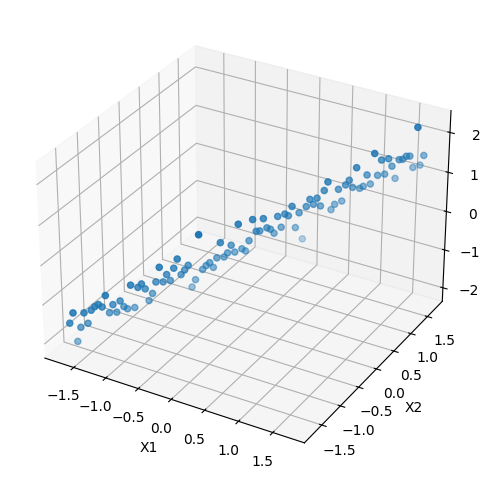

In [10]:
plt.figure(figsize=(10, 6))
ax = plt.axes(projection='3d')
ax.scatter3D(df['eval1'], df['eval2'], df['cal'], label="Datos con ruido")
ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_zlabel('Y')
plt.show()

## Lo que haremos es intentar predecir la columna cal, en base a eval1 y eval2.

In [11]:
lr = LinearRegression(number_features=2, learning_rate=0.01, n_iters=1000)

X = df[['eval1', 'eval2']].values
y = df['cal'].values

lr.fit(X, y)

## Ahora predecimos los valores

In [12]:
y_pred = lr.predict(X)
y_pred

array([-0.35017752, -0.61697944, -1.28398424, -0.11672584,  1.18393352,
       -0.2501268 , -0.81708088,  1.15058328, -1.65083688, -1.15058328,
        0.35017752,  0.9171316 ,  0.81708088,  0.7503804 , -0.28347704,
        0.85043112,  1.250634  , -0.9171316 ,  0.98383208, -0.55027896,
       -1.0838828 , -1.21728376,  0.28347704,  0.51692872, -0.21677656,
       -1.05053256, -0.78373064, -1.250634  , -0.85043112,  1.0838828 ,
        0.5836292 , -1.31733448, -1.61748664,  0.05002536,  1.35068472,
        1.28398424,  0.88378136, -0.95048184, -1.18393352, -1.4173852 ,
       -0.31682728, -0.51692872, -1.51743592, -0.88378136, -0.0833756 ,
        0.65032968, -1.45073544, -0.5836292 ,  1.01718232,  0.11672584,
       -0.48357848,  1.05053256, -0.7503804 ,  1.21728376, -0.98383208,
        0.95048184,  0.68367992, -0.68367992, -0.71703016,  0.416878  ,
        0.21677656,  0.55027896, -1.01718232,  1.48408568,  0.0833756 ,
       -0.65032968, -1.38403496,  1.11723304, -0.15007608,  1.51

## Graficamos 

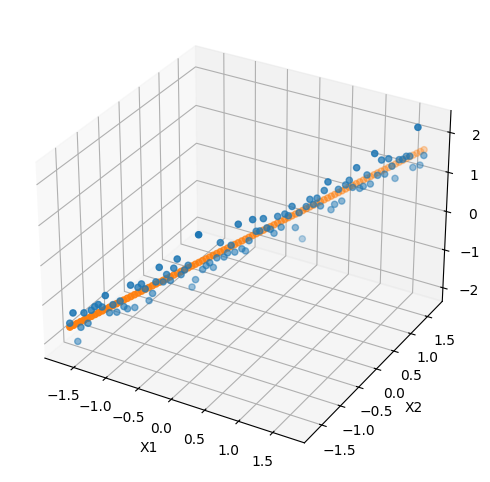

In [13]:
plt.figure(figsize=(10, 6))
ax = plt.axes(projection='3d')
ax.scatter3D(df['eval1'], df['eval1'], df['cal'], label="Datos con ruido")
ax.scatter3D(df['eval1'], df['eval2'], y_pred, label="Regresion lineal")
ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_zlabel('Y')
plt.show()


### Siguiendo la lógica de estos códigos podrías generar tu propia regresión cuadrática, cúbica, etc.


# Ahora reforcemos un poco lo básico de como entrenar un modelo usando la librería Sklearn.

## ¿Qué pasos debemos seguir para entrenar un modelo de Machine Learning?


1. **Análisis exploratorio de datos**: El contenido que vimos en la primera mitad del curso es fundamental, ya que necesitamos tener datos limpios y coherentes para lograr que nuestro modelo de ML funcione bien.

2. **Particionar los datos**: Utilizamos el método **train_test_split** para participar los datos. La idea de esto es la siguiente: Utilizamos una porción del dataset para entrenar al algoritmo de ML (La porción más grande, también llamda conjunto de entrenamiento o **train**). Y luego, una vez entrenado, utilizaremos la porción más pequeña (Conjunto **test** o de prueba). La aleatoriedad al participar los datos es útil ya que mejora los resultados del algoritmo.

3. **fase de train/test**: Aquí lo que hacemos es utilizar el método fit para entrenar el algoritmo usando el conjunto **train**, y luego con el método predict, obtener predicciones usando el conjunto de **test**.

4. **Evaluar que tan bien funciona el algoritmo**: Para ello, utilizamos métricas estadísticas, las cuales nos permitiran ver el desempeño de este.

El siguiente dataset es real, y fue extraido de [Kaggle](https://www.kaggle.com/datasets/spittman1248/cdc-data-nutrition-physical-activity-obesity?resource=download).

In [14]:
data = pd.read_csv('data/Nutrition__Physical_Activity__and_Obesity_-_Behavioral_Risk_Factor_Surveillance_System.csv', sep=',')

data_head = data.head()
data_info = data.info()
data_describe = data.describe()

(data_head, data_info, data_describe)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53392 entries, 0 to 53391
Data columns (total 33 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   YearStart                   53392 non-null  int64  
 1   YearEnd                     53392 non-null  int64  
 2   LocationAbbr                53392 non-null  object 
 3   LocationDesc                53392 non-null  object 
 4   Datasource                  53392 non-null  object 
 5   Class                       53392 non-null  object 
 6   Topic                       53392 non-null  object 
 7   Question                    53392 non-null  object 
 8   Data_Value_Unit             0 non-null      float64
 9   Data_Value_Type             53392 non-null  object 
 10  Data_Value                  48346 non-null  float64
 11  Data_Value_Alt              48346 non-null  float64
 12  Data_Value_Footnote_Symbol  5046 non-null   object 
 13  Data_Value_Footnote         504

(   YearStart  YearEnd LocationAbbr LocationDesc  \
 0       2011     2011           AL      Alabama   
 1       2011     2011           AL      Alabama   
 2       2011     2011           AL      Alabama   
 3       2011     2011           AL      Alabama   
 4       2011     2011           AL      Alabama   
 
                                    Datasource                    Class  \
 0  Behavioral Risk Factor Surveillance System  Obesity / Weight Status   
 1  Behavioral Risk Factor Surveillance System  Obesity / Weight Status   
 2  Behavioral Risk Factor Surveillance System  Obesity / Weight Status   
 3  Behavioral Risk Factor Surveillance System  Obesity / Weight Status   
 4  Behavioral Risk Factor Surveillance System  Obesity / Weight Status   
 
                      Topic                                           Question  \
 0  Obesity / Weight Status  Percent of adults aged 18 years and older who ...   
 1  Obesity / Weight Status  Percent of adults aged 18 years and older

In [15]:
# Conteo de valores nulos en columnas relevantes
null_counts = data[['Data_Value', 'Education', 'Income']].isnull().sum()

# Porcentaje de datos nulos
null_percentage = (null_counts / len(data)) * 100

(null_counts, null_percentage)

(Data_Value     5046
 Education     45764
 Income        40043
 dtype: int64,
 Data_Value     9.450854
 Education     85.713215
 Income        74.998127
 dtype: float64)

In [16]:
# Filtrado de datos: Mantener solo las filas donde "Data_Value", "Education" e "Income" no son nulos
data_complete = data.dropna(subset=['Data_Value', 'Education', 'Income'])

In [17]:
# Inspeccionar valores únicos en 'Education' e 'Income'
unique_education = data_complete['Education'].unique()
unique_income = data_complete['Income'].unique()

# Verificar tipos de datos de 'Education' e 'Income'
dtype_education = data_complete['Education'].dtype
dtype_income = data_complete['Income'].dtype

(unique_education, dtype_education, unique_income, dtype_income)

(array([], dtype=object), dtype('O'), array([], dtype=object), dtype('O'))

In [18]:
# Conteo de valores no nulos y valores únicos para cada columna
non_null_counts = data.notnull().sum()
unique_counts = data.nunique()

# Crear un DataFrame para visualizar la información
variable_info = pd.DataFrame({
    'non_null_counts': non_null_counts,
    'unique_counts': unique_counts
})

# Filtrar las variables con más del 70% de valores no nulos y al menos 2 valores únicos (para evitar constantes)
potential_predictors = variable_info[(variable_info['non_null_counts'] > 0.7 * len(data)) & (variable_info['unique_counts'] > 1)]

# Mostrar las variables potenciales para la predicción
potential_predictors.sort_values(by='non_null_counts', ascending=False)

,non_null_counts,unique_counts
YearStart,53392,6
YearEnd,53392,6
StratificationCategoryId1,53392,6
Stratification1,53392,28
StratificationCategory1,53392,6
LocationID,53392,55
QuestionID,53392,9
TopicID,53392,3
ClassID,53392,3
StratificationID1,53392,28


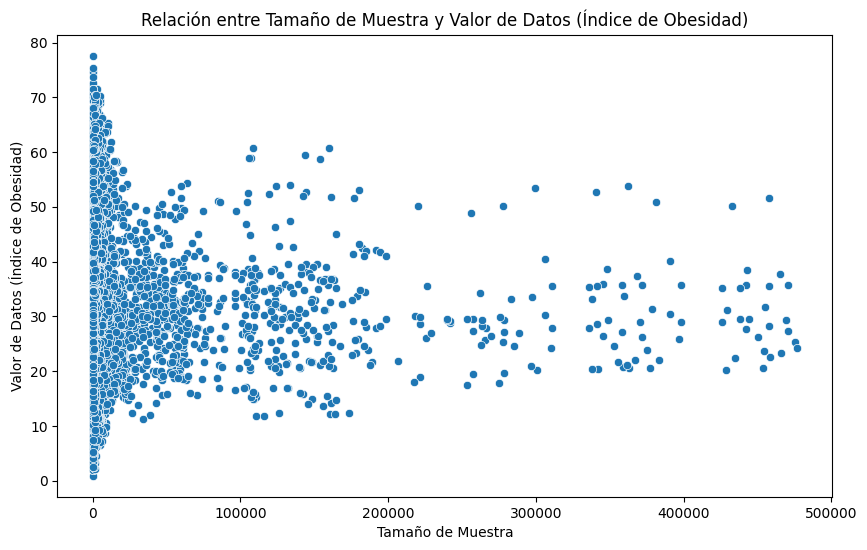

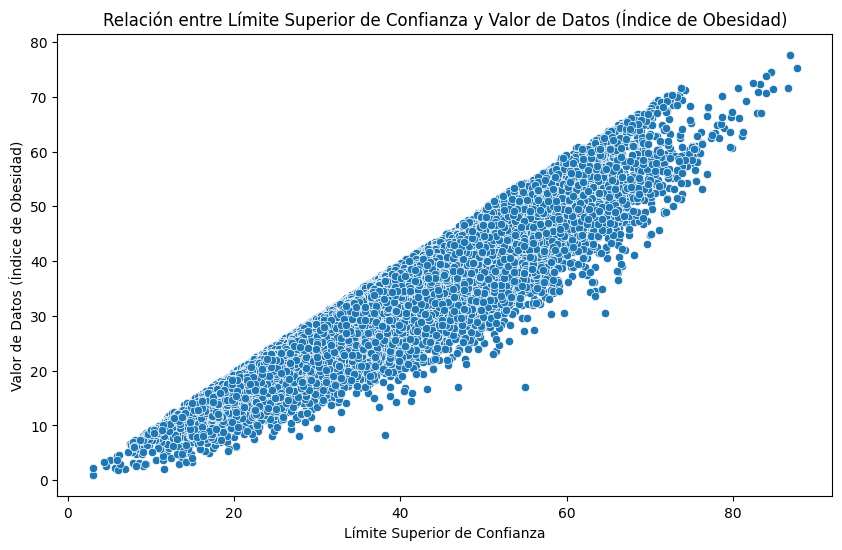

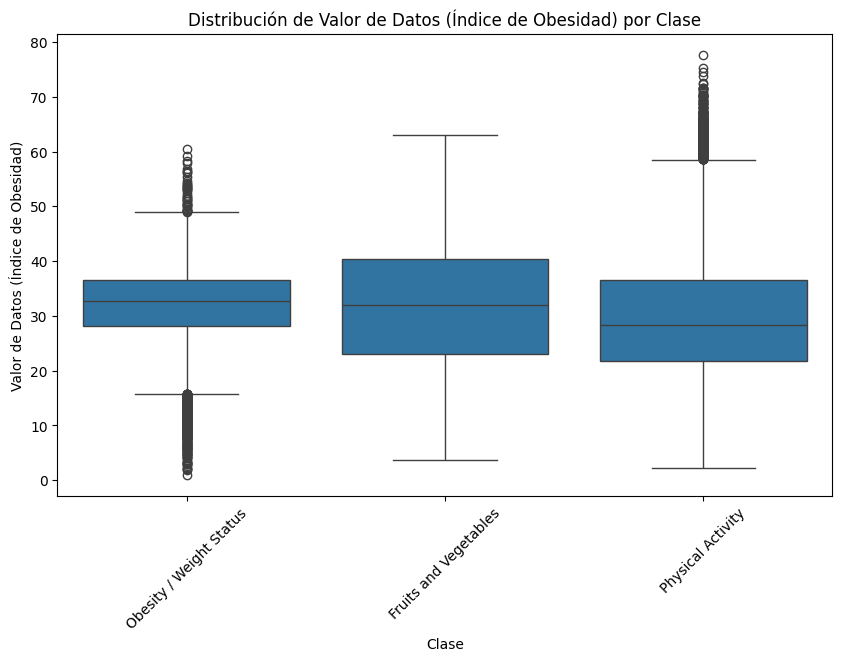

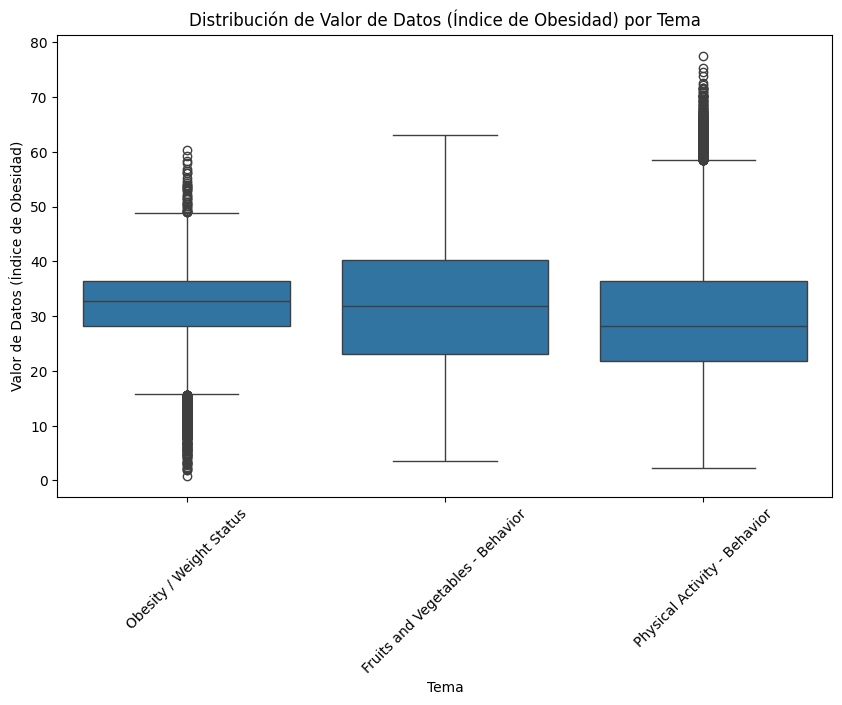

In [19]:
# Visualizar la relación entre "Sample_Size" y "Data_Value"
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Sample_Size', y='Data_Value', data=data)
plt.title('Relación entre Tamaño de Muestra y Valor de Datos (Índice de Obesidad)')
plt.xlabel('Tamaño de Muestra')
plt.ylabel('Valor de Datos (Índice de Obesidad)')
plt.show()

# Visualizar la relación entre "High_Confidence_Limit" y "Data_Value"
plt.figure(figsize=(10, 6))
sns.scatterplot(x='High_Confidence_Limit ', y='Data_Value', data=data)
plt.title('Relación entre Límite Superior de Confianza y Valor de Datos (Índice de Obesidad)')
plt.xlabel('Límite Superior de Confianza')
plt.ylabel('Valor de Datos (Índice de Obesidad)')
plt.show()

# Visualizar la distribución de "Data_Value" por "Class"
plt.figure(figsize=(10, 6))
sns.boxplot(x='Class', y='Data_Value', data=data)
plt.xticks(rotation=45)
plt.title('Distribución de Valor de Datos (Índice de Obesidad) por Clase')
plt.xlabel('Clase')
plt.ylabel('Valor de Datos (Índice de Obesidad)')
plt.show()

# Visualizar la distribución de "Data_Value" por "Topic"
plt.figure(figsize=(10, 6))
sns.boxplot(x='Topic', y='Data_Value', data=data)
plt.xticks(rotation=45)
plt.title('Distribución de Valor de Datos (Índice de Obesidad) por Tema')
plt.xlabel('Tema')
plt.ylabel('Valor de Datos (Índice de Obesidad)')
plt.show()

In [20]:
from sklearn.metrics import mean_absolute_error, r2_score, root_mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split


# Elegimos las columnas que vamos a usar para entrenar el modelo

In [21]:
num_vars = ['Low_Confidence_Limit', 'Sample_Size']
cat_vars = ['Class', 'Topic']

# Eliminar filas con valores nulos en 'Data_Value'
data_model = data.dropna(subset=['Data_Value'])

# División de datos en conjuntos de entrenamiento y prueba
X = data_model[num_vars + cat_vars]
y = data_model['Data_Value']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# transformar variables categoricas a dummy si es que existen.

In [22]:
# Codificación One-Hot de variables categóricas
X_train_encoded = pd.get_dummies(X_train, columns=cat_vars)
X_test_encoded = pd.get_dummies(X_test, columns=cat_vars)



# Entrenar el modelo con el metodo fit y realizar la prediccion con predict.

In [23]:
model = LinearRegression()
model.fit(X_train_encoded, y_train)

# Realizar predicciones
y_pred = model.predict(X_test_encoded)

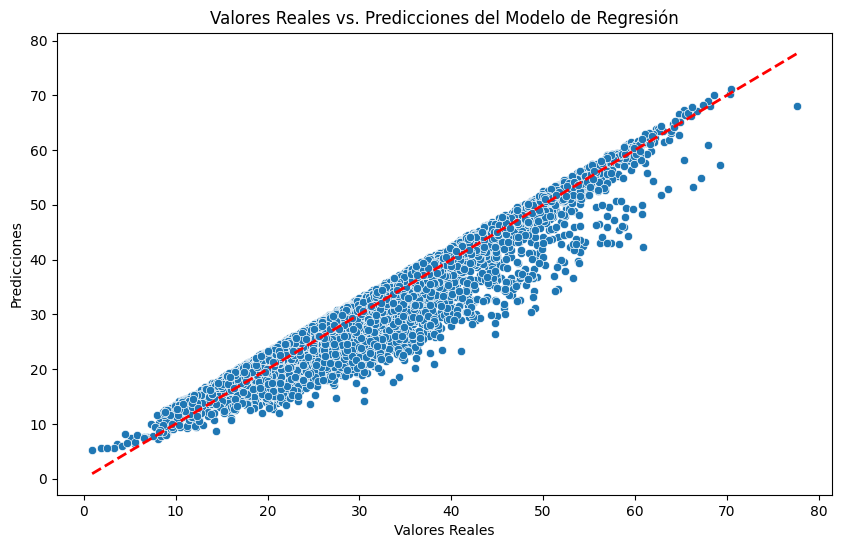

In [24]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', lw=2, linestyle='--')
plt.xlabel('Valores Reales')
plt.ylabel('Predicciones')
plt.title('Valores Reales vs. Predicciones del Modelo de Regresión')
plt.show()

# Evaluar el modelo en base a métricas.

In [25]:
mae = mean_absolute_error(y_test, y_pred)
rmse = root_mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

(mae, rmse, r2)

(2.06996655847163, 3.011219021758344, 0.9123903560178497)

## Estas son algunas de hartas métricas que pueden usar para evaluar que tan bien funciona su modelo de ML

- 1. **Mean Absolute Value**: Es el promedio de las diferencias en valor absoluto entre las predicciones y los valores reales.

$$MAE = \frac{1}{n} \sum_{i=1}^{n} |(y_i - \hat{y}_i)|$$

**En este contexto esperamos que sea un valor bajo. Mientras mas bajo sea, significa que mejor se ajusta el modelo (Si es 0 es un ajuste perfecto)**

- 2. **root mean squared error**: Es la raiz cuadrada del error cuadrático medio.

$$RMSE =\sqrt{ \frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)}$$

**En este contexto esperamos también un valor bajo. La virtud de este error es que penaliza los errores grandes, por lo que si el valor de este fuese mayor que el MAE, signfiica que hay outliers o errores muy grandes**

-3. $R^2$ Score: Mide la proporción de varianza en los datos de salida que el modelo es capaz de explicar. Indica qué tan bien las predicciones replican los resultados reales.

$$ R^2 = \frac{(y_i - \hat{y}_i)^2}{(y_i - \overline{y})^2}$$

**Un valor cercano a 1 indica que indica que la regresión lineal está bien ajustada, es decir, que el modelo explica bien la variabilidad de los datos**


# Regresion KNN

Esta regresión es una de las más fáciles de entender por la simplicidad del algoritmo.

Lo que hacemos iterar, eligiendo los K vecinos más cercanos (los puntos más cerca) usando como criterio de proximidad algun tipo de distancia (Puede ser euclideana o Manhattan por ejemplo), y en base a esos K vecinos más cercanos generamos la predicción como un promedio de los K vecinos.


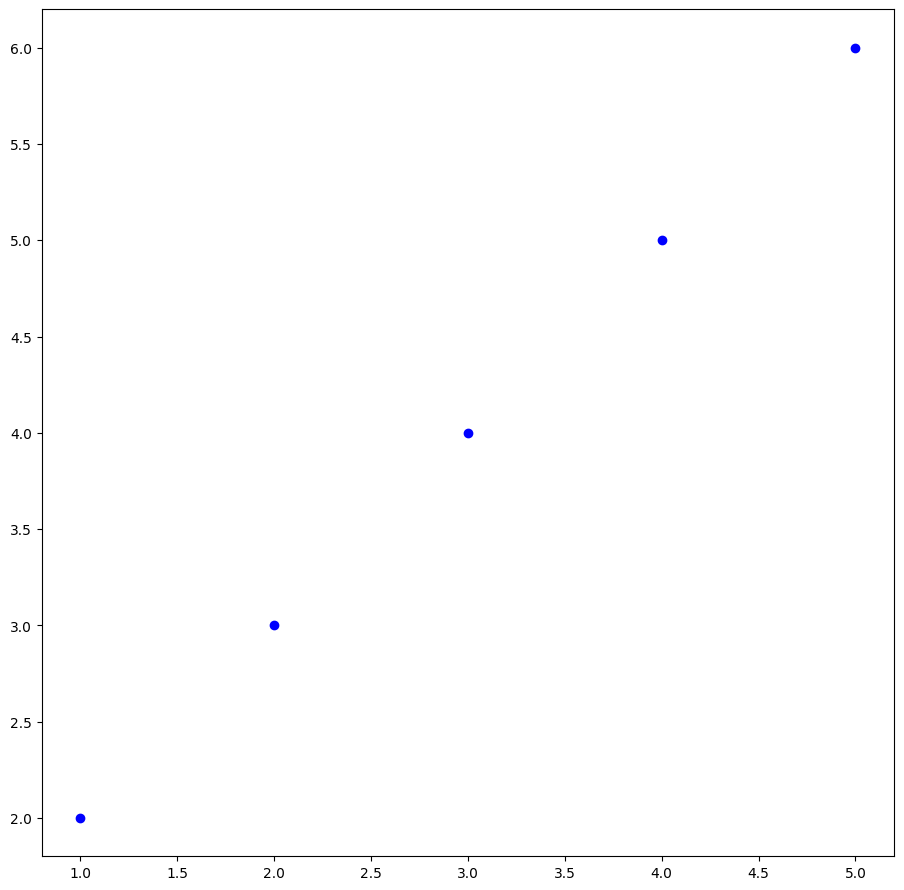

In [26]:
X_train = np.array([[1, 2], [2, 3], [3, 4], [4, 5], [5, 6]])
y_train = np.array([2, 3, 4, 5, 6])
X_test = np.array([[2.5, 3.5], [4.5, 5.5]])
plt.scatter(X_train[:, 0], y_train, label="Training Data", color="blue")

In [27]:
# KNN regression
k = 2

# Make predictions for the test data
predictions = []
for x_test in X_test:
    # Calculate distances between x_test and all data points in X_train
    distances = [np.linalg.norm(x_test - x_train) for x_train in X_train]

    # Sort data points by distance and get the indices of the K nearest neighbors
    k_indices = np.argsort(distances)[:k]

    # Get the target values of the K nearest neighbors
    k_nearest_neighbors = [y_train[i] for i in k_indices]

    # Calculate the regression prediction as the mean of the target values of the K neighbors
    prediction = np.mean(k_nearest_neighbors)
    predictions.append(prediction)


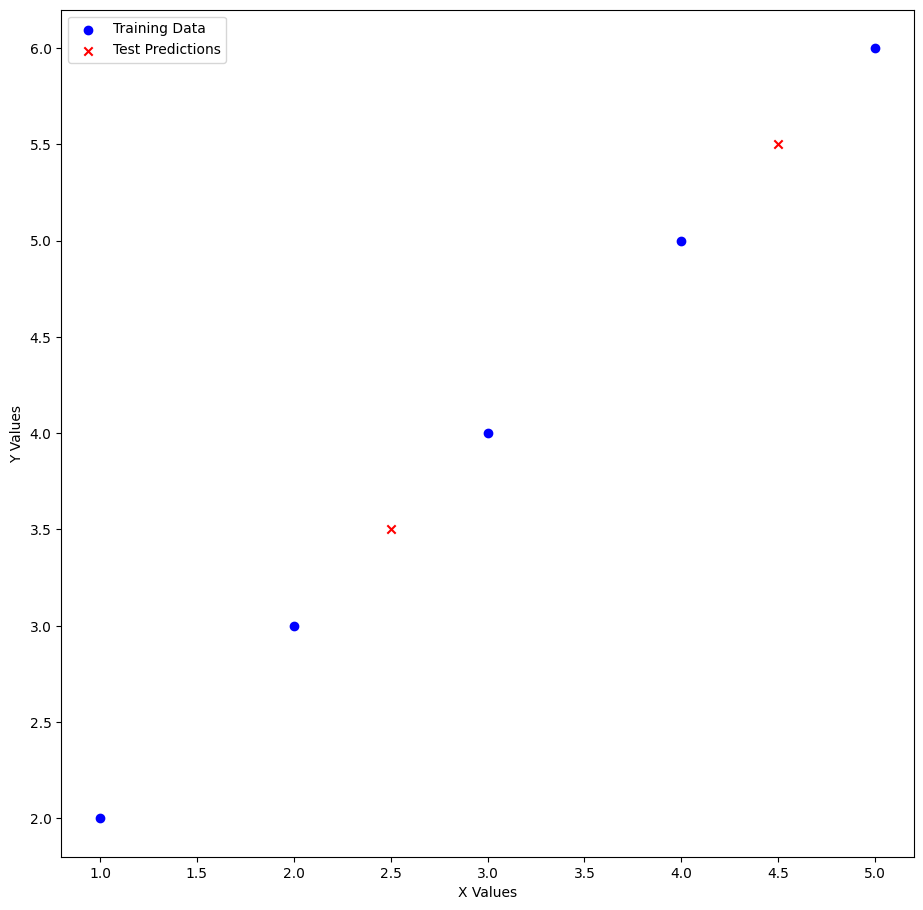

In [28]:
# Plot the training data points
plt.scatter(X_train[:, 0], y_train, label="Training Data", color="blue")

# Plot the test data points and their predictions
plt.scatter(X_test[:, 0], predictions, label="Test Predictions", color="red", marker="x")

plt.xlabel("X Values")
plt.ylabel("Y Values")
plt.legend()
plt.show()

## Ahora que entendemos la idea detrás implementemos esto con Sklearn.

## Recordemos que vamos a usar los mismos procedimientos que en la parte anterior, por lo que podemos reciclar el código.

In [29]:
from sklearn.neighbors import KNeighborsRegressor

In [30]:
num_vars = ['Low_Confidence_Limit', 'Sample_Size']
cat_vars = ['Class', 'Topic']

data_model = data.dropna(subset=['Data_Value'])


X = data_model[num_vars + cat_vars]
y = data_model['Data_Value']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train_encoded = pd.get_dummies(X_train, columns=cat_vars)
X_test_encoded = pd.get_dummies(X_test, columns=cat_vars)


In [31]:
knn = KNeighborsRegressor(n_neighbors=5)


knn.fit(X_train_encoded, y_train)

KNeighborsRegressor()

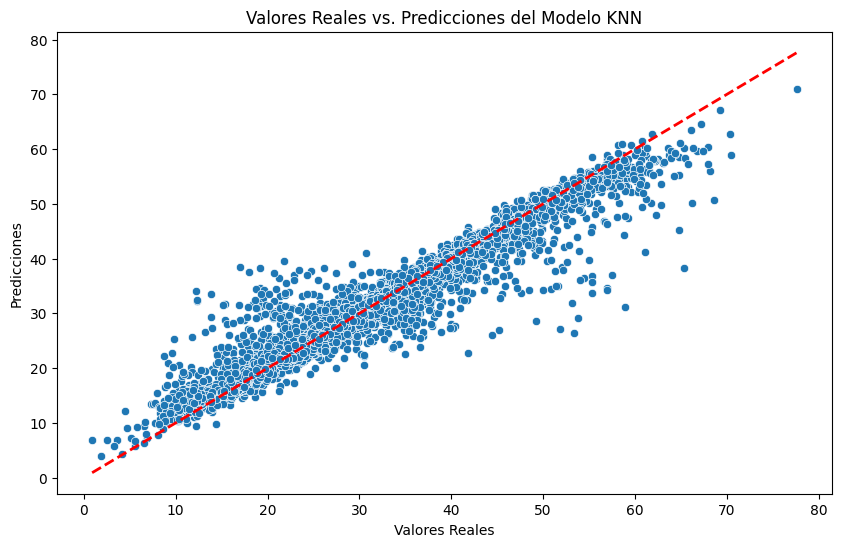

In [32]:

y_pred = knn.predict(X_test_encoded)


plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', lw=2, linestyle='--')
plt.xlabel('Valores Reales')
plt.ylabel('Predicciones')
plt.title('Valores Reales vs. Predicciones del Modelo KNN')
plt.show()


In [33]:
mae = mean_absolute_error(y_test, y_pred)
rmse = root_mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

(mae, rmse, r2)

(1.4211437435367116, 2.593069890712144, 0.9350325725703663)

# ¿Se ajusta un poco mejor?

# Underfitting y Overfitting

Un problema común es que tengamos dificultades respecto al **rendimiento de un modelo al generalizar sobre nuevos datos**.


## ¿Cuando un modelo tiene Underfitting?

Esto suele ocurrir si el modelo tiene una estructura demasiado básica o si se ajusta con muy pocos parámetros, como una línea recta para datos que no son lineales.

### Cómo identificarlo:

Un modelo con underfitting tiene un rendimiento bajo tanto en los datos de entrenamiento como en los datos de prueba, pues no es capaz de aprender los patrones correctamente debido a su simplicidad.


## ¿Cuando un modelo tiene Overfitting?

Overfitting ocurre cuando un modelo se ajusta demasiado a los datos de entrenamiento, capturando no solo los patrones reales, sino también el "ruido" o las anomalías específicas de esos datos (Suele ocurrir en modelos muy complejos)

### Cómo identificarlo:

Un modelo con overfitting tiene un rendimiento alto en los datos de entrenamiento pero bajo en los datos de prueba, ya que no puede generalizar a nuevos datos que no ha visto antes.


Para profundizar más en esto, revisar [aquí](https://aws.amazon.com/what-is/overfitting/#:~:text=Underfit%20models%20experience%20high%20bias,bias%20but%20variance%20can%20increase.)

### Para el overfitting tenemos como opción usar la regresión Ridge o Lasso.

# Regresión Ridge
Queremos solucionar el problema de overfitting. Para ello, Ridge usa una penalización, que hace que el modelo sea menos sensible a las variables explicativas.
Sabemos que la regresión lineal estándar busca minimizar los cuadrados de los residuales (OLS), pero ahora añadimos el término de penalty. 
$$\text{OLS} = \text{min} \sum_{i=1}^n(y_i - \hat{y_i} )^2$$
$$\text{Ridge} = \text{min} \sum_{i=1}^n(y_i - \hat{y_i} )^2 + \alpha \sum_{j=1}^p \beta_j^2$$

## Revisemos como nos va con el dataset 

In [34]:
from sklearn.linear_model import Ridge

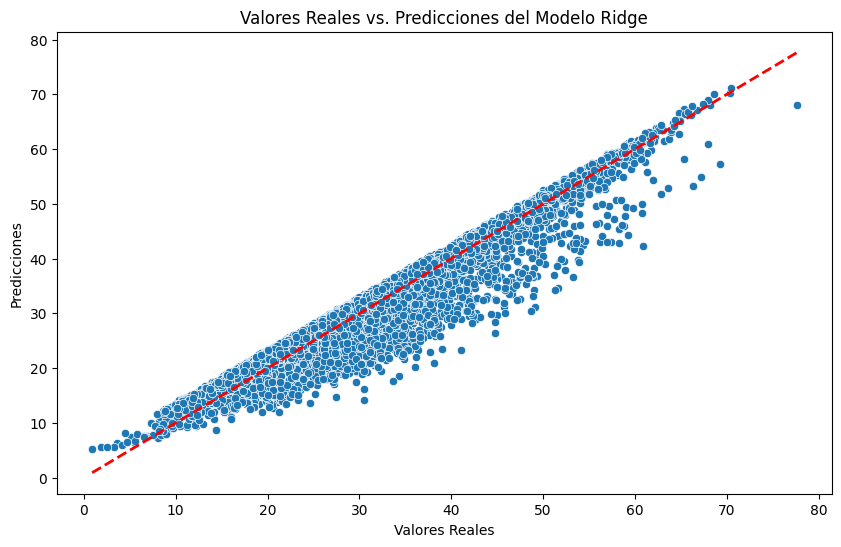

In [35]:
ridge = Ridge(alpha=1.0)


ridge.fit(X_train_encoded, y_train)


y_pred = ridge.predict(X_test_encoded)


plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', lw=2, linestyle='--')
plt.xlabel('Valores Reales')
plt.ylabel('Predicciones')
plt.title('Valores Reales vs. Predicciones del Modelo Ridge')
plt.show()

In [36]:
mae = mean_absolute_error(y_test, y_pred)
rmse = root_mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

(mae, rmse, r2)

(2.0699666953682283, 3.0112190414919167, 0.9123903548695763)

# Regresion Lasso
Es casi igual a la regresion Ridge, pero con otra norma ($l_1$).

$$\text{Lasso} = \text{min} \sum_{i=1}^n(y_i - \hat{y_i} )^2 + \alpha \sum_{j=1}^p |\beta_j|$$

In [37]:
from sklearn.linear_model import Lasso

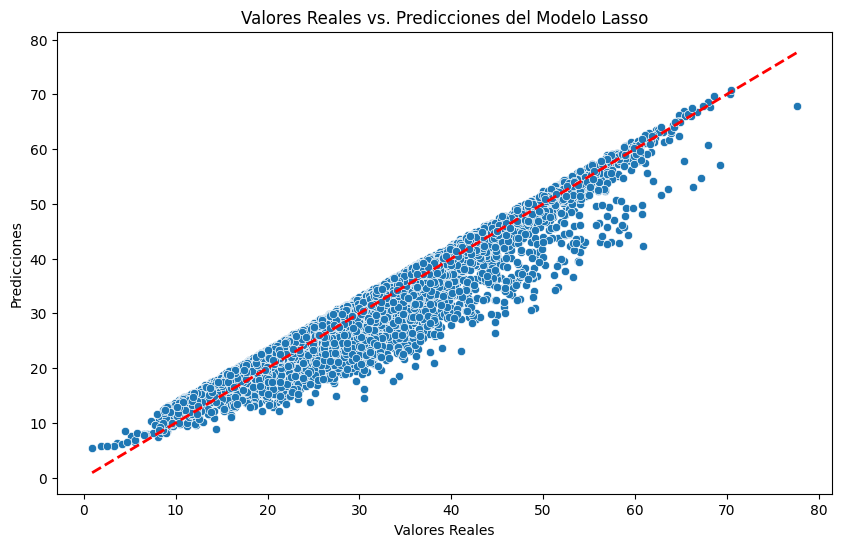

In [38]:

lasso = Lasso(alpha=1.0)


lasso.fit(X_train_encoded, y_train)


y_pred = lasso.predict(X_test_encoded)


plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', lw=2, linestyle='--')
plt.xlabel('Valores Reales')
plt.ylabel('Predicciones')
plt.title('Valores Reales vs. Predicciones del Modelo Lasso')
plt.show()

In [39]:
mae = mean_absolute_error(y_test, y_pred)
rmse = root_mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

(mae, rmse, r2)


(2.0761369165429544, 3.0142480898479453, 0.9122140094623136)